In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
df_H4_raw = pd.read_csv('/home/zhouxin/PTPY/DATA/AUDUSD/H4/AUDUSD_H4_mid_20190101_20190815.csv')

In [3]:
df_H4 = df_H4_raw.copy()
df_H4 = df_H4.set_index('Datetime')
df_H4.index = pd.to_datetime(df_H4.index)
df_H4.head()

,Close,High,Low,Open,Volume
Datetime,,,,,
2019-01-02 05:00:00,0.70410,0.70532,0.70383,0.70506,616.0
2019-01-02 09:00:00,0.70189,0.70450,0.70016,0.70404,1574.0
2019-01-02 13:00:00,0.70185,0.70446,0.70098,0.70194,2495.0
2019-01-02 17:00:00,0.70044,0.70220,0.70033,0.70180,1463.0
2019-01-02 21:00:00,0.69988,0.70106,0.69820,0.70040,2383.0


In [4]:
df_M5_bid_raw = pd.read_csv('/home/zhouxin/PTPY/DATA/AUDUSD/M5/AUDUSD_M5_bid_20190101_20190815.csv')
df_M5_ask_raw = pd.read_csv('/home/zhouxin/PTPY/DATA/AUDUSD/M5/AUDUSD_M5_ask_20190101_20190815.csv')

In [5]:
df_M5_bid = df_M5_bid_raw.copy()
df_M5_bid = df_M5_bid.set_index('Datetime')
df_M5_bid.index = pd.to_datetime(df_M5_bid.index)
df_M5_bid.columns = [ii+'_Bid' for ii in df_M5_bid.columns]
df_M5_bid.head()

,Close_Bid,High_Bid,Low_Bid,Open_Bid,Volume_Bid
Datetime,,,,,
2019-01-02 06:00:00,0.70460,0.70513,0.70438,0.70451,19.0
2019-01-02 06:05:00,0.70450,0.70495,0.70445,0.70448,48.0
2019-01-02 06:10:00,0.70449,0.70466,0.70444,0.70449,19.0
2019-01-02 06:15:00,0.70457,0.70458,0.70449,0.70449,12.0
2019-01-02 06:20:00,0.70501,0.70501,0.70468,0.70468,8.0


In [6]:
df_M5_ask = df_M5_ask_raw.copy()
df_M5_ask = df_M5_ask.set_index('Datetime')
df_M5_ask.index = pd.to_datetime(df_M5_ask.index)
df_M5_ask.columns = [ii+'_Ask' for ii in df_M5_ask.columns]
df_M5_ask.head()

,Close_Ask,High_Ask,Low_Ask,Open_Ask,Volume_Ask
Datetime,,,,,
2019-01-02 06:00:00,0.70552,0.70560,0.70519,0.70560,19.0
2019-01-02 06:05:00,0.70526,0.70574,0.70526,0.70528,48.0
2019-01-02 06:10:00,0.70528,0.70548,0.70520,0.70526,19.0
2019-01-02 06:15:00,0.70516,0.70528,0.70502,0.70528,12.0
2019-01-02 06:20:00,0.70539,0.70558,0.70528,0.70533,8.0


In [7]:
df_M5_comb = pd.concat([df_M5_bid, df_M5_ask], axis=1)
df_M5_comb.head()

,Close_Bid,High_Bid,Low_Bid,Open_Bid,Volume_Bid,Close_Ask,High_Ask,Low_Ask,Open_Ask,Volume_Ask
Datetime,,,,,,,,,,
2019-01-02 06:00:00,0.70460,0.70513,0.70438,0.70451,19.0,0.70552,0.70560,0.70519,0.70560,19.0
2019-01-02 06:05:00,0.70450,0.70495,0.70445,0.70448,48.0,0.70526,0.70574,0.70526,0.70528,48.0
2019-01-02 06:10:00,0.70449,0.70466,0.70444,0.70449,19.0,0.70528,0.70548,0.70520,0.70526,19.0
2019-01-02 06:15:00,0.70457,0.70458,0.70449,0.70449,12.0,0.70516,0.70528,0.70502,0.70528,12.0
2019-01-02 06:20:00,0.70501,0.70501,0.70468,0.70468,8.0,0.70539,0.70558,0.70528,0.70533,8.0


# Research
Range is correlated 

In [8]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
#%matplotlib inline

In [9]:
R_window = 12
R2_window = 18
df_H4['Range'] = df_H4['High'] - df_H4['Low']
df_H4['R'] = df_H4['High'].rolling(R_window).apply(lambda x: max(x)) - df_H4['Low'].rolling(R_window).apply(lambda x: min(x))
df_H4['R2'] = df_H4['High'].rolling(R2_window).apply(lambda x: max(x)) - df_H4['Low'].rolling(R2_window).apply(lambda x: min(x))
df_H4 = df_H4.dropna()

/home/zhouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.
/home/zhouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


In [10]:
df_H4.Range.describe()

count    961.000000
mean       0.001857
std        0.001091
min        0.000260
25%        0.001160
50%        0.001580
75%        0.002270
max        0.010530
Name: Range, dtype: float64

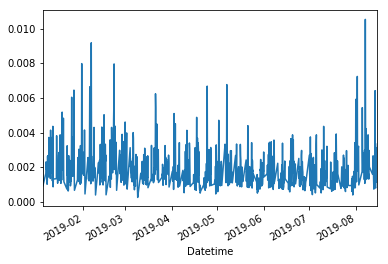

In [11]:
df_H4.Range.plot()

In [12]:
def autocorrelation_plot(series, max_lag):
    lag_list = range(1, max_lag+1)
    df_corr = []
    for lag in lag_list:
        df_corr.append({'Lag': lag, 'Corr': np.corrcoef(series.values[lag:], series[:-lag])[0, 1]})
    df_corr = pd.DataFrame(df_corr, columns=['Lag', 'Corr'])
    plt.plot(df_corr.Lag, df_corr.Corr)
    plt.title('AutoCorrelation')
    plt.xlabel('Lag')
    plt.ylabel('Corr')
    plt.grid()  
    plt.show()
    return df_corr
    

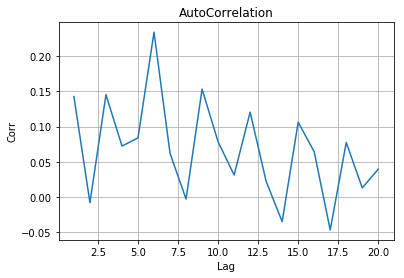

In [13]:
df_corr = autocorrelation_plot(df_H4.Range.copy(), 20)

In [14]:
plt.scatter(df_H4_Range.values, df_H4_Range.shift(6).values)
plt.scatter(df_H4_Range.shift(6).values, df_H4_Range.values)
plt.tight_layout()
plt.xlim([-0.002, 0.013])
plt.ylim([-0.002, 0.013])

NameError: name 'df_H4_Range' is not defined

Range of curent 4 hour bar is correlated to 24 hours ago. 

This correlation means there is high chance that both current 4 hour range and 4 hour range 24 hours ago will be larger than the mean range

# Strategy

Center assumption: 

R: Range of past 48 hours
R2: Range of past 72 hours

Long Entry: 

    1. (cur_price - cur_open_H4) < k1 * R

Exit:

    1. Take profit, k2 * R
    2. Stop loss,  R

In [105]:
def backtesting(df, parameters):
    
    # backtesting variables
    start_index = -1
    init = False
    pos = False
    enter_trade_list = []
    exit_trade_list = []
    # parameters
    R_window = parameters['R_window']
    k1 = parameters['k1']
    k2 = parameters['k2']
    k3 = parameters['k3']
    min_indicator = parameters['min_indicator']
    max_indicator = parameters['max_indicator']
    # start backtesting
    for ii in range(len(df)):
        cur_index = ii
        cur_datetime = df.index[ii]


        # initialze 
        if not init:
            if  start_index < 0:
                start_index = ii
            passedIndex = cur_index - start_index
            if passedIndex == R_window*12:#######
                cur_R = df[start_index:(ii+1)].High_Ask.max()-df[start_index:(ii+1)].Low_Bid.min()
                start_index = ii
                cur_Range_open = df['Open_Bid'].iloc[ii]
                init = True
            continue
        passedIndex = cur_index - start_index

        # update indicator
        if passedIndex == 4*12:#######
            R_prev_index = ii - 96*12#######
            cur_R = df[R_prev_index:(ii+1)].High_Ask.max()-df[R_prev_index:(ii+1)].Low_Bid.min() 
            cur_Range_open = df['Open_Bid'].iloc[ii]
            take_profit = k2*cur_R
            stop_loss = k3*cur_R
            start_index = ii
            pos = False
            continue

        # start backtesting
        cur_high_bid = df.High_Bid.iloc[ii]
        cur_low_bid = df.Low_Bid.iloc[ii]
        cur_close_bid = df.Close_Bid.iloc[ii]

        cur_high_ask = df.High_Ask.iloc[ii]
        cur_low_ask = df.Low_Ask.iloc[ii]
        cur_close_ask = df.Close_Ask.iloc[ii]
        
        condition = (cur_R > min_indicator) and (cur_R < max_indicator) 
        if cur_low_bid < (cur_Range_open - k1*cur_R) and pos == False and condition:
            enter_price = cur_close_ask
            enter_trade_list.append({'Datetime': cur_datetime, 'Price': enter_price, 'Direction': 'Long', 'Pos': 1.0, 'R': cur_R})
            pos = True
        for trade in enter_trade_list:
            TP = None
            SL = None
            enter_price = trade['Price']
            enter_direction = trade['Direction']
            if enter_direction == 'Long':
                TP = (cur_high_bid - enter_price) > take_profit
                SL =  (enter_price - cur_low_ask) > stop_loss
            try:
                assert (TP and SL) != True 
            except:
                print(trade)
                print('----')
            if TP or SL:
                enter_R = trade['R']
                enter_datetime = trade['Datetime']
                enter_direction = trade['Direction']
                enter_pos = trade['Pos']
                exit_datetime = cur_datetime
                exit_pos = enter_pos  
                if TP:
                    exit_direction = 'TP'
                if SL:
                    exit_direction = 'SL'

                if enter_direction == 'Long':
                    exit_price = cur_close_bid
                    pnl = exit_price - enter_price 

                exit_trade_list.append({'Enter_datetime': enter_datetime, 'Enter_price': enter_price, 'Enter_direction': enter_direction, 'Enter_pos': enter_pos,
                    'Exit_datetime': exit_datetime, 'Exit_price': exit_price, 'Exit_direction': exit_direction, 'Exit_pos': exit_pos, 'R': enter_R,
                                         'PnL': pnl*10000.0,})
                enter_trade_list.remove(trade)                
    df_trade = pd.DataFrame(exit_trade_list)
    return df_trade

In [19]:
k1_list = np.linspace(0.05, 0.5, 21)
k2_list = np.linspace(0.05, 0.5, 21)
df_trade_long_dict = {}

for k1 in k1_list:
    print('k1: ', k1)
    for k2 in k2_list:
        print('k2: ', k2)
        start_time = time.time()
        parameters = {'R_window': 96, 'k1': k1, 'k2': k2}
        df_trade_long = backtesting(df_M5_comb['2019-01-01':'2019-06-30'], parameters)   
        df_trade_long_dict[(k1, k2)] = df_trade_long        
        print("--- %s seconds ---" % (time.time() - start_time))
np.save("df_trade_long_dict.npy", df_trade_long_dict)


k1:  0.05
k2:  0.05
--- 4.373407602310181 seconds ---
k2:  0.07250000000000001
--- 4.360973834991455 seconds ---
k2:  0.095
--- 4.423848390579224 seconds ---
k2:  0.11750000000000001
--- 4.47707462310791 seconds ---
k2:  0.14
--- 4.5324602127075195 seconds ---
k2:  0.16249999999999998
--- 4.57413911819458 seconds ---
k2:  0.185
--- 4.5849621295928955 seconds ---
k2:  0.20750000000000002
--- 5.076170444488525 seconds ---
k2:  0.22999999999999998
--- 4.688050031661987 seconds ---
k2:  0.2525
--- 4.747941970825195 seconds ---
k2:  0.27499999999999997
--- 4.761400461196899 seconds ---
k2:  0.2975
--- 4.781757831573486 seconds ---
k2:  0.32
--- 5.278651714324951 seconds ---
k2:  0.34249999999999997
--- 5.320939064025879 seconds ---
k2:  0.365
--- 5.325971603393555 seconds ---
k2:  0.38749999999999996
--- 5.334064722061157 seconds ---
k2:  0.41
--- 5.343826770782471 seconds ---
k2:  0.4325
--- 5.392846345901489 seconds ---
k2:  0.45499999999999996
--- 4.969606876373291 seconds ---
k2:  0.477

# Analyze backtesting result

1. Sharpe ratio
2. Num of trade 
3. 

In [15]:
def max_sub_array(array):
    """ Finds msub-array with maximum sum and returns the maximum sum and sub-array"""
    max_start, max_stop = 0, 1 # Start, Stop of maximum sub-array
    curr = 0                   # pointer to current array
    max_sum = array[0]         # Sum of maximum array
    current_sum = 0            # sum of current array

    for i, elem in enumerate(array):
        current_sum +=  elem

        if max_sum < current_sum:
            max_sum = current_sum 
            max_start = curr
            max_stop = i  + 1
        if current_sum < 0:
            current_sum = 0
            curr = i + 1

    return  max_start, max_stop
def calculate_dailyPnL(df_price, df_trade):
    Daily_PnL_list = []
    for ii in range(len(df_trade)):
        trade = df_trade.iloc[ii]
        start_datetime = trade['Enter_datetime']
        end_datetime = trade['Exit_datetime']
        start_date = start_datetime.date()
        end_date = end_datetime.date()
        if end_date == start_date:
            daily_pnl = (trade['Exit_price'] - trade['Enter_price'])*trade['Enter_pos']
            Daily_PnL_list.append(pd.Series({str(start_date): daily_pnl}))

        if end_date > start_date:
            dateRange = pd.date_range(start=start_date, end=end_date, freq='D')
            df_dailyPnL = calculate_dailyPnL_perTrade(df_price, trade)
            # need to calculate daily PnL from start_date to end_date
            Daily_PnL_list.append(df_dailyPnL)
                
    df_daily_pnl = pd.concat(Daily_PnL_list)
    df_daily_pnl = pd.DataFrame(df_daily_pnl.groupby(df_daily_pnl.index).sum())
    df_daily_pnl.columns = ['Daily_PnL']
    df_daily_pnl['Daily_PnL'] = df_daily_pnl['Daily_PnL']*1e4
    df_daily_pnl.index = pd.to_datetime(df_daily_pnl.index)
    df_daily_pnl['Date'] = df_daily_pnl.index
    df_daily_pnl['Net_PnL'] = df_daily_pnl['Daily_PnL'].cumsum()
    df_daily_pnl['Daily_Drawdown'] = [-max(0.0, (df_daily_pnl['Net_PnL'].iloc[:(ii+1)].max() - df_daily_pnl['Net_PnL'].iloc[ii])) for ii in range(len(df_daily_pnl))]

    return df_daily_pnl
def calculate_dailyPnL_perTrade(df_price, trade):
    start_datetime = trade['Enter_datetime']
    end_datetime = trade['Exit_datetime']
    start_date = start_datetime.date()
    end_date = end_datetime.date()
    Enter_price = trade['Enter_price']
    Exit_price = trade['Exit_price']
    Enter_direction = trade['Enter_direction']
    Enter_pos = trade['Enter_pos']
    if Enter_direction == 'Long':
        settle_type = 'Close_Bid'
    else:
        settle_type = 'Close_Ask'
    if end_date > start_date:
        dateRange = pd.date_range(start=start_date, end=end_date, freq='D')
        lastPrice_dict = {}
        for day in dateRange:
            day = str(day.date())      
            try:
                #print(df[day].iloc[-1])
                lastPrice = df_price[day].iloc[-1][settle_type]
                lastPrice_dict[day] = lastPrice
            except IndexError:
                lastPrice_dict[day] = lastPrice
        df_lastPrice = pd.DataFrame.from_dict(lastPrice_dict, orient='Index', columns=['lastPrice'])
        df_lastPrice['lastPrice'].iloc[-1] = Exit_price
        df_lastPrice['Daily_PnL'] = df_lastPrice.diff()*Enter_pos
        df_lastPrice['Daily_PnL'].iloc[0] = (df_lastPrice['lastPrice'].iloc[0] - Enter_price)*Enter_pos
        df_dailyPnL = df_lastPrice['Daily_PnL'].copy()
    return df_dailyPnL

def backtest_metrics(df_daily_pnl, trade_pnl, strategy_type, display=False):
    # Return a dictionary contains backtesting metrics like sharpe ratio, drawdown.
    d = {}
    #d['initial_fund'] = df_daily_pnl['net_PnL'].iloc[0]
    #d['final_fund'] = df_daily_pnl['net_PnL'].iloc[-1]
    d['start_date'] = df_daily_pnl['Date'].iloc[0]
    d['end_date'] = df_daily_pnl['Date'].iloc[-1]
    d['total_return'] = round(df_daily_pnl['Daily_PnL'].sum(), 2)
    d['total_trade_counts'] = len(trade_pnl)
    d['win_trade_counts'] = len(trade_pnl[trade_pnl['PnL'] > 0.0])
    d['loss_trade_counts'] = len(trade_pnl[trade_pnl['PnL'] < 0.0])
    d['avg_win_per_trade'] = round(trade_pnl[trade_pnl['PnL'] > 0.0]['PnL'].mean(), 2)
    d['avg_loss_per_trade'] = round(trade_pnl[trade_pnl['PnL'] < 0.0]['PnL'].mean(), 2)    
    d['max_drawdown'] = round(df_daily_pnl['Daily_Drawdown'].min(), 2)
    d['sharpe_ratio'] = round(np.sqrt(252) * df_daily_pnl['Daily_PnL'].mean() / df_daily_pnl['Daily_PnL'].std(), 2)
    if display:
        print('Backtesting results for '+strategy_type)
        print('------------------------------------------')
        for ii in d.keys():
            print(ii, ":", d[ii])
        print(' ')
        print(' ')
    return d

In [11]:
df_trade_long_dict = np.load('df_trade_long_dict.npy', allow_pickle=True)
df_trade_long_dict = df_trade_long_dict[()]

In [19]:
indicator_list = ['R']
for indicator in indicator_list:
    c = 0
    results = {}
    print(len(df_trade_long_dict))
    for params, trade_pnl in df_trade_long_dict.items():
        print(c)
        c += 1
        try:
            df_daily_pnl = calculate_dailyPnL(df_M5_comb, trade_pnl)
            d = backtest_metrics(df_daily_pnl, trade_pnl, 'AUD Reversal', display=False)
            results[params] = d    
            plt.figure(figsize=(10, 6))
            plt.subplot(2,2,1)
            trade_pnl[indicator].plot(title=indicator)
            max_start, max_end = max_sub_array(trade_pnl.sort_values(indicator).PnL)
            max_IndValue = trade_pnl.sort_values(indicator)[indicator].values[max_end-1]
            min_IndValue = trade_pnl.sort_values(indicator)[indicator].values[max_start]
            df = trade_pnl[(trade_pnl[indicator]>min_IndValue) & (trade_pnl[indicator]<max_IndValue)]
            
            df_daily_pnl = calculate_dailyPnL(df_M5_comb, df)
            d = backtest_metrics(df_daily_pnl, df, 'AUD Reversal', display=False)
            results[params] = d
            
            df = df.set_index('Enter_datetime')
            plt.subplot(2,2,2)
            plt.title(indicator)
            trade_pnl_sorted = trade_pnl.sort_values(indicator)
            sorted_cumsumPnL = trade_pnl_sorted.PnL.cumsum()
            plt.plot(trade_pnl_sorted[indicator], sorted_cumsumPnL)
            plt.plot([min_IndValue]*100, np.linspace(sorted_cumsumPnL.min(), sorted_cumsumPnL.max(), 100))
            plt.plot([max_IndValue]*100, np.linspace(sorted_cumsumPnL.min(), sorted_cumsumPnL.max(), 100))
            plt.subplot(2,2,3)
            df.PnL.cumsum().plot(title='filtered PnL')
            plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
            plt.subplot(2,2,4)
            trade_pnl.PnL.cumsum().plot(title='original PnL')
            #plt.show()

            plt.savefig('%s/k1=%s_k2=%s.png'% (indicator, params[0], params[1]), bbox_inches='tight')
        except:
            pass
    print('  ')
    print('  ')
    print('  ')

441
0


/home/zhouxin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246


/home/zhouxin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737138.3680555555, right=737138.3680555555
  'left=%s, right=%s') % (left, right))


247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263


/home/zhouxin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737131.3125, right=737131.3125
  'left=%s, right=%s') % (left, right))


264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357


/home/zhouxin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737200.5, right=737200.5
  'left=%s, right=%s') % (left, right))


358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438


/home/zhouxin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737200.5486111111, right=737200.5486111111
  'left=%s, right=%s') % (left, right))


439
440
  
  
  


# Vistualize results

In [42]:
test = results.copy()

In [43]:
for params, result in test.items():
    test[params]['adj_SR'] = test[params]['sharpe_ratio']*test[params]['total_trade_counts']

In [23]:
import seaborn as sns
import matplotlib.pylab as plt

<Figure size 432x288 with 0 Axes>

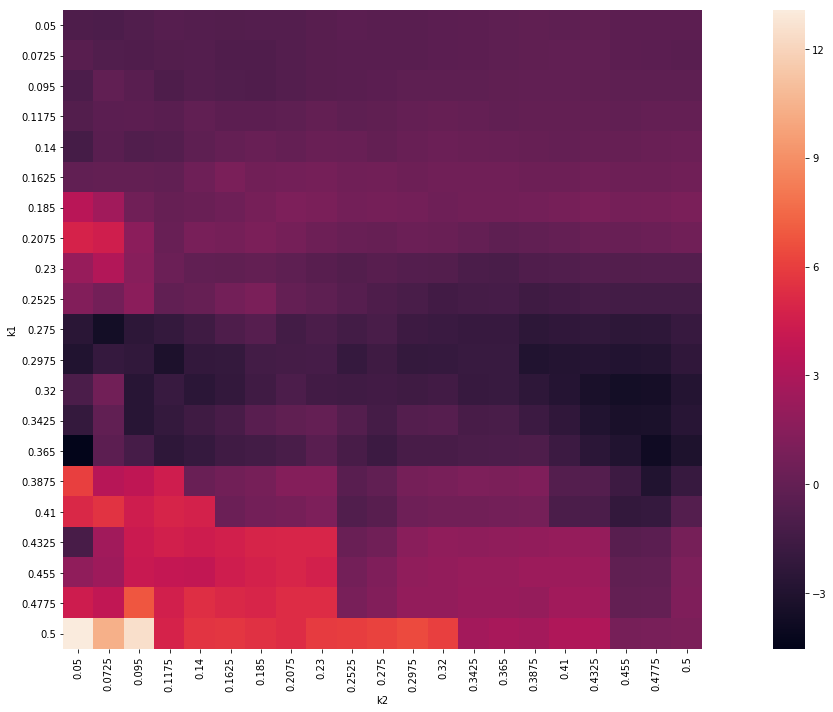

In [40]:
metric = 'sharpe_ratio'
df_metric = []
for params, result in results.items():
    k1 = params[0]
    k2 = params[1]
    metric_value = result[metric]
    df_metric.append({'k1': k1, 'k2': k2, '%s'%metric: metric_value})
df_metric = pd.DataFrame(df_metric)
df_metric = df_metric.round(4)
plt.clf()
piv = pd.pivot_table(df_metric, values=metric,index=["k1"], columns=["k2"], fill_value=0)
plt.figure(figsize=(20, 10))
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

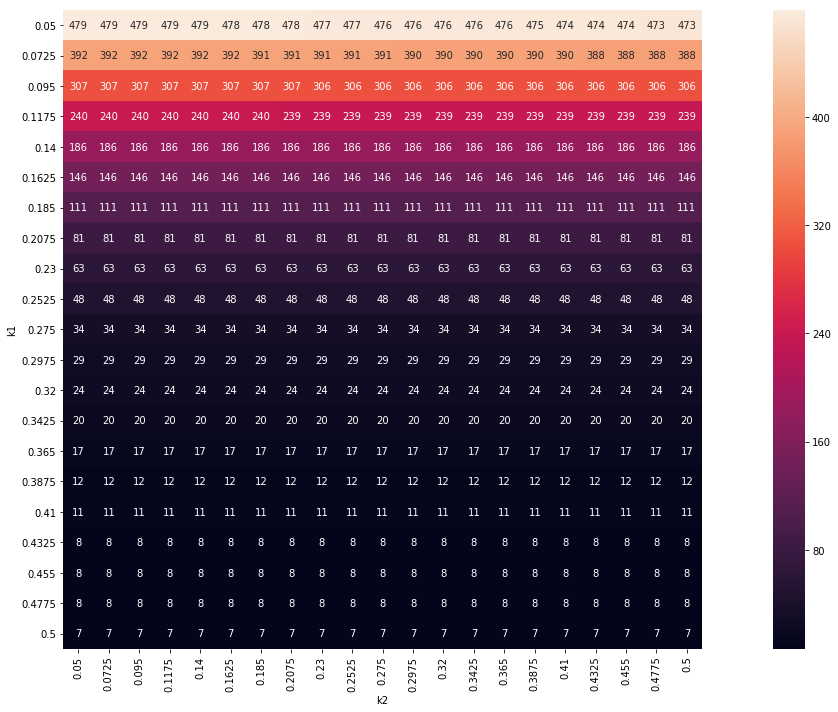

In [52]:
metric = 'total_trade_counts'
df_metric = []
for params, result in results.items():
    k1 = params[0]
    k2 = params[1]
    metric_value = result[metric]
    df_metric.append({'k1': k1, 'k2': k2, '%s'%metric: metric_value})
df_metric = pd.DataFrame(df_metric)
df_metric = df_metric.round(4)
plt.clf()
piv = pd.pivot_table(df_metric, values=metric,index=["k1"], columns=["k2"], fill_value=0)
plt.figure(figsize=(20, 10))
ax = sns.heatmap(piv, square=True, annot=True, fmt="d")
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

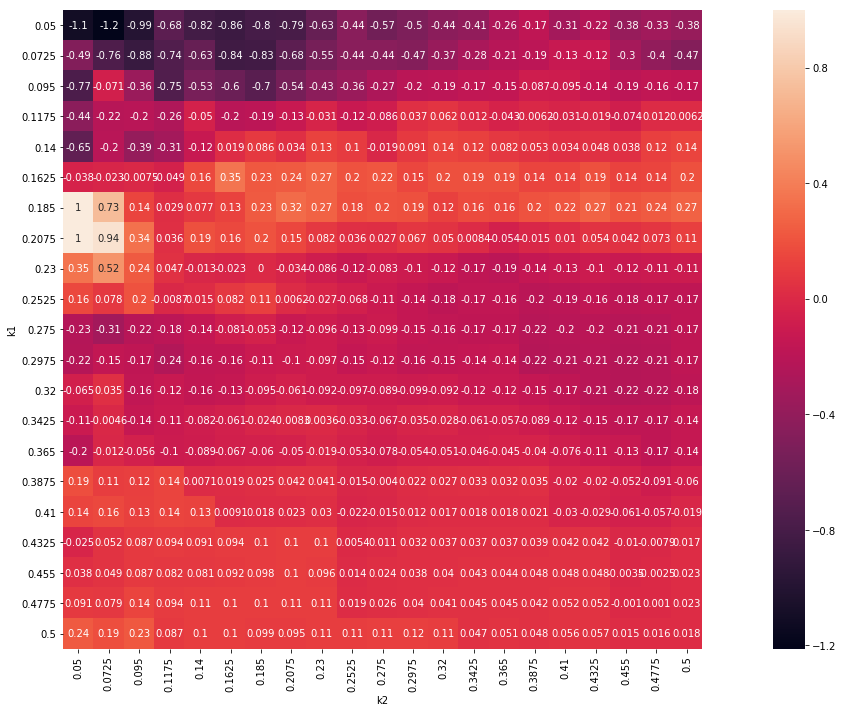

In [58]:
metric = 'adj_SR'
df_metric = []
for params, result in results.items():
    k1 = params[0]
    k2 = params[1]
    metric_value = result[metric]
    df_metric.append({'k1': k1, 'k2': k2, '%s'%metric: metric_value})
df_metric = pd.DataFrame(df_metric)
df_metric = df_metric.round(4)
df_metric['adj_SR'] = df_metric['adj_SR']/(df_metric['adj_SR'].max())
plt.clf()
piv = pd.pivot_table(df_metric, values=metric,index=["k1"], columns=["k2"], fill_value=0)
plt.figure(figsize=(20, 10))
ax = sns.heatmap(piv, square=True, annot=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

In [62]:
list(results.keys())

[(0.05, 0.05),
 (0.05, 0.07250000000000001),
 (0.05, 0.095),
 (0.05, 0.11750000000000001),
 (0.05, 0.14),
 (0.05, 0.16249999999999998),
 (0.05, 0.185),
 (0.05, 0.20750000000000002),
 (0.05, 0.22999999999999998),
 (0.05, 0.2525),
 (0.05, 0.27499999999999997),
 (0.05, 0.2975),
 (0.05, 0.32),
 (0.05, 0.34249999999999997),
 (0.05, 0.365),
 (0.05, 0.38749999999999996),
 (0.05, 0.41),
 (0.05, 0.4325),
 (0.05, 0.45499999999999996),
 (0.05, 0.4775),
 (0.05, 0.5),
 (0.07250000000000001, 0.05),
 (0.07250000000000001, 0.07250000000000001),
 (0.07250000000000001, 0.095),
 (0.07250000000000001, 0.11750000000000001),
 (0.07250000000000001, 0.14),
 (0.07250000000000001, 0.16249999999999998),
 (0.07250000000000001, 0.185),
 (0.07250000000000001, 0.20750000000000002),
 (0.07250000000000001, 0.22999999999999998),
 (0.07250000000000001, 0.2525),
 (0.07250000000000001, 0.27499999999999997),
 (0.07250000000000001, 0.2975),
 (0.07250000000000001, 0.32),
 (0.07250000000000001, 0.34249999999999997),
 (0.07250

<Figure size 432x288 with 0 Axes>

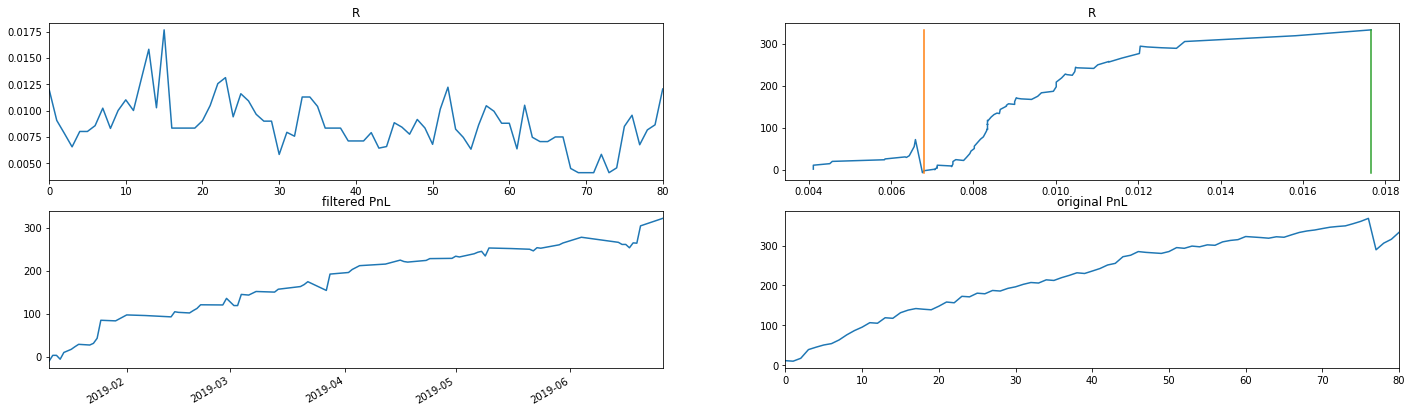

In [103]:
plt.clf()
indicator = 'R'
#k1 = 0.1625
#k2 = 0.23
params = (0.20750000000000002, 0.07250000000000001)
#params = (0.16249999999999998, 0.22999999999999998)
trade_pnl = df_trade_long_dict[params]
 
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
trade_pnl[indicator].plot(title=indicator)
max_start, max_end = max_sub_array(trade_pnl.sort_values(indicator).PnL)
max_IndValue = trade_pnl.sort_values(indicator)[indicator].values[max_end-1]
min_IndValue = trade_pnl.sort_values(indicator)[indicator].values[max_start]
df = trade_pnl[(trade_pnl[indicator]>min_IndValue) & (trade_pnl[indicator]<max_IndValue)]

df_daily_pnl = calculate_dailyPnL(df_M5_comb, df)
d = backtest_metrics(df_daily_pnl, df, 'AUD Reversal', display=False)
results[params] = d   

df = df.set_index('Enter_datetime')
plt.subplot(2,2,2)
plt.title(indicator)
trade_pnl_sorted = trade_pnl.sort_values(indicator)
sorted_cumsumPnL = trade_pnl_sorted.PnL.cumsum()
plt.plot(trade_pnl_sorted[indicator], sorted_cumsumPnL)
plt.plot([min_IndValue]*100, np.linspace(sorted_cumsumPnL.min(), sorted_cumsumPnL.max(), 100))
plt.plot([max_IndValue]*100, np.linspace(sorted_cumsumPnL.min(), sorted_cumsumPnL.max(), 100))
plt.subplot(2,2,3)
df_daily_pnl.Daily_PnL.cumsum().plot(title='filtered PnL')
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.subplot(2,2,4)
trade_pnl.PnL.cumsum().plot(title='original PnL')
plt.show()



In [106]:
max_IndValue

0.017659999999999898

In [107]:
min_IndValue

0.006800000000000028

In [104]:
d

{'avg_loss_per_trade': -1.49,
 'avg_win_per_trade': 8.02,
 'end_date': Timestamp('2019-06-26 00:00:00'),
 'loss_trade_counts': 21,
 'max_drawdown': -24.5,
 'sharpe_ratio': 6.67,
 'start_date': Timestamp('2019-01-11 00:00:00'),
 'total_return': 321.7,
 'total_trade_counts': 65,
 'win_trade_counts': 44}

In [84]:
def backtest_metrics(df_daily_pnl, trade_pnl, strategy_type, display=False):
    # Return a dictionary contains backtesting metrics like sharpe ratio, drawdown.
    d = {}
    #d['initial_fund'] = df_daily_pnl['net_PnL'].iloc[0]
    #d['final_fund'] = df_daily_pnl['net_PnL'].iloc[-1]
    d['start_date'] = df_daily_pnl['Date'].iloc[0]
    d['end_date'] = df_daily_pnl['Date'].iloc[-1]
    d['total_return'] = round(df_daily_pnl['Daily_PnL'].sum(), 2)
    d['total_trade_counts'] = len(trade_pnl)
    d['win_trade_counts'] = len(trade_pnl[trade_pnl['PnL'] > 0.0])
    d['loss_trade_counts'] = len(trade_pnl[trade_pnl['PnL'] < 0.0])
    d['avg_win_per_trade'] = round(trade_pnl[trade_pnl['PnL'] > 0.0]['PnL'].mean(), 2)
    d['avg_loss_per_trade'] = round(trade_pnl[trade_pnl['PnL'] < 0.0]['PnL'].mean(), 2)    
    d['max_drawdown'] = round(df_daily_pnl['Daily_Drawdown'].min(), 2)
    d['sharpe_ratio'] = round(np.sqrt(252) * df_daily_pnl['Daily_PnL'].mean() / df_daily_pnl['Daily_PnL'].std(), 2)
    if display:
        print('Backtesting results for '+strategy_type)
        print('------------------------------------------')
        for ii in d.keys():
            print(ii, ":", d[ii])
        print(' ')
        print(' ')
    return d

# Single test

In [108]:
k1 = 0.2
k2 = 0.08
k3 = 0.75
min_indicator = 0.007
max_indicator = 0.0176
parameters = {'R_window': 96, 'k1': k1, 'k2': k2, 'k3': k3, 'min_indicator': min_indicator, 'max_indicator': max_indicator}
df_trade_long = backtesting(df_M5_comb['2019-01-01':'2019-06-30'], parameters)   

In [109]:
df_daily_pnl = calculate_dailyPnL(df_M5_comb, df_trade_long)
d = backtest_metrics(df_daily_pnl, df_trade_long, 'AUD Reversal', display=True)

Backtesting results for AUD Reversal
------------------------------------------
start_date : 2019-01-11 00:00:00
end_date : 2019-06-26 00:00:00
total_return : 321.4
total_trade_counts : 75
win_trade_counts : 52
loss_trade_counts : 22
avg_win_per_trade : 8.11
avg_loss_per_trade : -4.55
max_drawdown : -100.0
sharpe_ratio : 4.54
 
 


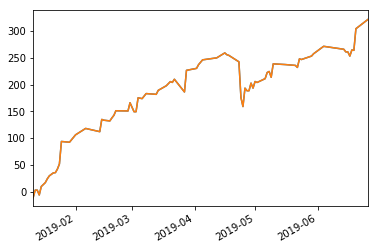

In [111]:
df_daily_pnl.Daily_PnL.cumsum().plot()
plt.show()

# Single out of sample test

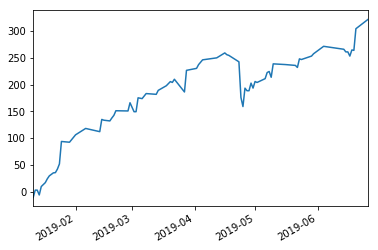

In [132]:
k1 = 0.2
k2 = 0.08
k3 = 0.75
min_indicator = 0.007
max_indicator = 0.0176
parameters = {'R_window': 96, 'k1': k1, 'k2': k2, 'k3': k3, 'min_indicator': min_indicator, 'max_indicator': max_indicator}
df_trade_long = backtesting(df_M5_comb['2019-01-01':'2019-06-30'], parameters)   

df_daily_pnl = calculate_dailyPnL(df_M5_comb['2019-01-01':'2019-06-30'], df_trade_long)
d = backtest_metrics(df_daily_pnl, df_trade_long, 'AUD Reversal', display=False)
df_daily_pnl.Daily_PnL.cumsum().plot()
plt.show()

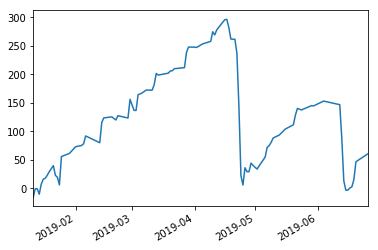

In [133]:
df_M5_comb_random = df_M5_comb.copy() + np.random.rand(*df_M5_comb.shape) / 1000.0
k1 = 0.2
k2 = 0.08
k3 = 0.75
min_indicator = 0.007
max_indicator = 0.0176
parameters = {'R_window': 96, 'k1': k1, 'k2': k2, 'k3': k3, 'min_indicator': min_indicator, 'max_indicator': max_indicator}
df_trade_long = backtesting(df_M5_comb_random['2019-01-01':'2019-06-30'], parameters)   

df_daily_pnl = calculate_dailyPnL(df_M5_comb_random, df_trade_long)
d = backtest_metrics(df_daily_pnl, df_trade_long, 'AUD Reversal', display=False)
df_daily_pnl.Daily_PnL.cumsum().plot()
plt.show()

In [ ]:
df_daily_pnl = calculate_dailyPnL(df_M5_comb+np.random.rand(*test.shape) / 1000.0, df_trade_long)
d = backtest_metrics(df_daily_pnl, df_trade_long, 'AUD Reversal', display=False)
df_daily_pnl.Daily_PnL.cumsum().plot()
plt.show()

作者：ddr Fe
链接：https://www.zhihu.com/question/26024883/answer/32361602
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

1.实盘和回测最基本的区别是，回测存在虚假交易的问题，导致实盘的偏差。为了规避这个问题，我一般都是回测中使用close or open 价格下单，就是说等一根K线走完了才下单，避免在K线中下单，这样测试的结果实盘和回测之间不会出现成交不了的情况。

2.上面的答主提到的overfit, 过拟合的问题。对于策略和数据间的overfit, 我建议可以利用加扰测试的办法。就是在原始数据上人工加上一个随机的扰动，再把测试的结果同未加扰的数据测试结果比较，理想的情况是变化很小。这种想法的来源是，如果一个策略确实是一个规律，它就应该是性质良好的，至少是连续的，连续的函数对输入的微小扰动应该有抑制作用，使输出有界。而对于参数的overfit就相对简单，不要选孤立的参数点就行了。

3.关于策略有效性的问题才是大问题，回测挣再多，未来不适用，或者很快失效了，这才是题主提到的问题的关键。确切讲，没啥好办法，或者大家有好办法也不说出来（这算是交易最核心的问题了），呵呵。我来提供点思路：
1.测试的数据尽可能多；
2.做完回测，做前测， 就是分数据内和数据外测试， 不过对效果持怀疑态度。
3.干货来了， 国外有家公司， trading system lab，这家公司干的活是用遗传算法来搜索好的策略，一般看到交易网站上，前面带TSL的策略都是他家出的。他们提出一个标准来筛选策略，很简单，但应该比较有效，1) 策略在回测中交易次数越多越好；2) 表示策略的程序越短越好。这句话比较模糊，我的理解是表示程序的自动机转移路径数目越少越好；